In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('3. CLEAN/District Population Census.csv')

In [3]:
data.head()

,State Code,State Name,District Code,District Name,Census Year,Persons,Males,Females
0,1,Jammu & Kashmir,1,Kupwara,1901,110979,59073,51906
1,1,Jammu & Kashmir,1,Kupwara,1911,124744,66161,58583
2,1,Jammu & Kashmir,1,Kupwara,1921,137936,73990,63946
3,1,Jammu & Kashmir,1,Kupwara,1931,153758,82443,71315
4,1,Jammu & Kashmir,1,Kupwara,1941,170079,91247,78832


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7563 entries, 0 to 7562
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State Code     7563 non-null   int64         
 1   State Name     7563 non-null   object        
 2   District Code  7563 non-null   int64         
 3   District Name  7563 non-null   object        
 4   Census Year    7563 non-null   datetime64[ns]
 5   Persons        7563 non-null   int64         
 6   Males          7563 non-null   int64         
 7   Females        7563 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 472.8+ KB


In [20]:
data.describe()

,State Code,District Code,Persons,Males,Females
count,7563.000000,7563.000000,7.563000e+03,7.563000e+03,7.563000e+03
mean,17.061351,319.408700,8.469324e+05,4.364273e+05,4.105051e+05
std,9.467490,185.756033,9.354001e+05,4.857124e+05,4.508021e+05
min,1.000000,1.000000,1.680000e+02,9.100000e+01,7.700000e+01
25%,9.000000,158.000000,2.473050e+05,1.276475e+05,1.197490e+05
50%,18.000000,318.000000,5.635980e+05,2.891760e+05,2.754410e+05
75%,24.000000,483.000000,1.101784e+06,5.664880e+05,5.366075e+05
max,35.000000,640.000000,1.106015e+07,5.865078e+06,5.195070e+06


In [ ]:
# Data Cleaning

In [19]:
data.isnull().sum()

State Code       0
State Name       0
District Code    0
District Name    0
Census Year      0
Persons          0
Males            0
Females          0
dtype: int64

In [8]:
data['Census Year'] = pd.to_datetime(data['Census Year'], format='%Y')

In [23]:
# Check for and remove duplicates
data = data.drop_duplicates()

In [24]:
data.dtypes

State Code                int64
State Name               object
District Code             int64
District Name            object
Census Year      datetime64[ns]
Persons                   int64
Males                     int64
Females                   int64
dtype: object

In [ ]:
# [EDA]

In [69]:
data['State Code'].nunique()

35

In [70]:
data['State Code'].nunique() == data['State Name'].nunique()

True

In [71]:
data['District Code'].nunique()

614

In [72]:
# [EDA] Some distict name are change over time
data['District Code'].nunique() == data['District Name'].nunique()

False

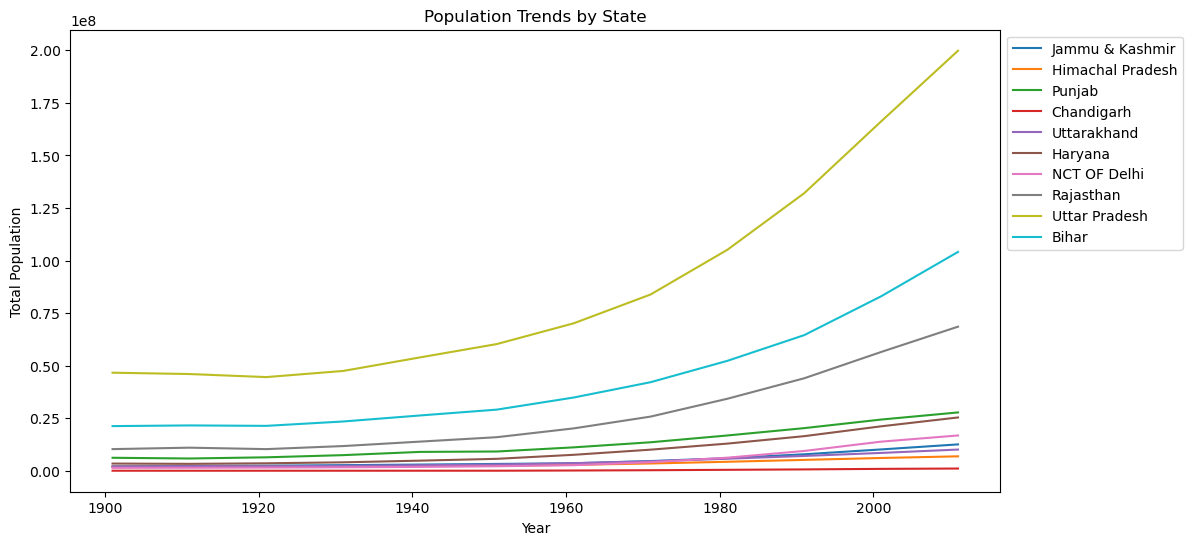

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot population trends for each state
plt.figure(figsize=(12, 6))
for state in list(data['State Name'].unique())[:10]:
    state_data = data[data['State Name'] == state].groupby('Census Year')['Persons'].sum().reset_index().sort_values(by='Census Year')
    plt.plot(state_data['Census Year'], state_data['Persons'], label=state) #.pct_change()

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends by State')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


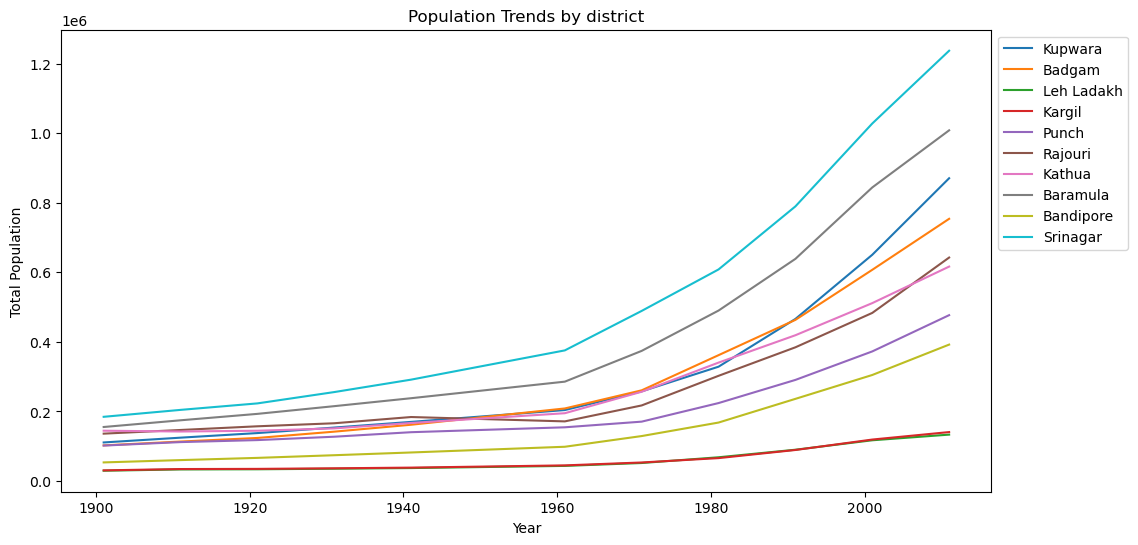

In [75]:
# Plot population trends for each district
plt.figure(figsize=(12, 6))
for district in list(data['District Name'].unique())[:10]:
    district_data = data[data['District Name'] == district]
    plt.plot(district_data['Census Year'], district_data['Persons'], label=district)

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends by district')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


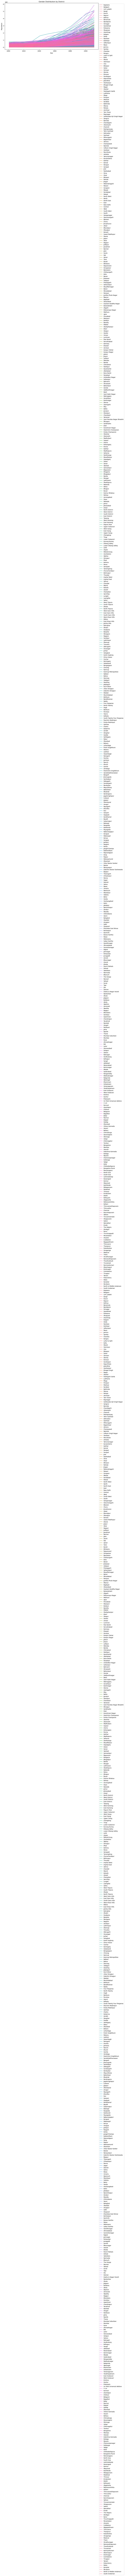

In [77]:
# Plot gender distribution over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Census Year', y='Males', hue='District Name')
sns.lineplot(data=data, x='Census Year', y='Females', hue='District Name', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Gender Distribution by District')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

614

['Jammu & Kashmir',
 'Himachal Pradesh',
 'Punjab',
 'Chandigarh',
 'Uttarakhand',
 'Haryana',
 'NCT OF Delhi',
 'Rajasthan',
 'Uttar Pradesh',
 'Bihar']